### 1.	[10 pts] A shocking result.

Consider the set of differential equations that comes from the field of electronics.
$$\frac{dx}{dt}=z$$

$$\frac{dy}{dt}=x^2+y^2-4$$

$$\frac{dz}{dt}=-4x-x^2+y^2$$

with initial conditions $x_0=-1.8, y_0=-1.5, z_0=-2.5$.

Use Euler’s method to simulate these equations.  Determine the value of the differential equations over 100 periods in which you make 1000 calculations per period. In other words, the step size (dt) is 0.001 and you make a total of 100,000 calculations (= 100 periods * 1000 calculations/period). 

Provide an iteration plot with x, y, and z on one plot.  Also, provide a phase map for x and y and, on a separate plot, a phase map for x and z. Put x on the horizontal axis for both of these plots.

Based on these plots, describe what is happening with these differential equations.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
#dx/dt 
def euli_boi(x0, z0, y0, dt, iters):
  x = np.zeros(iters)
  y = np.zeros(iters)
  z = np.zeros(iters)
  time = np.zeros(iters)
  time[0]= 0
  x[0]= x0
  y[0] = y0
  z[0] = z0
  for iter in range(1, iters, 1):
    x[iter] = x[iter-1] + (z[iter-1]*dt)
    y[iter] = y[iter-1] + ((x[iter-1]**2) + (y[iter-1]**2) - 4)*dt
    z[iter] = z[iter-1] + ((-4* x[iter-1]) - (x[iter-1]**2) + (y[iter-1]**2))*dt
    time[iter] = time[iter-1] + dt
    
  return x, y, z, time
x = euli_boi(-1.8,-2.5,-1.5, 0.001,100000)[0]
y = euli_boi(-1.8,-2.5,-1.5, 0.001,100000)[1]
z = euli_boi(-1.8,-2.5,-1.5, 0.001,100000)[2]
time = euli_boi(-1.8,-2.5,-1.5, 0.001,100000)[3]

No handles with labels found to put in legend.


<function matplotlib.pyplot.show>

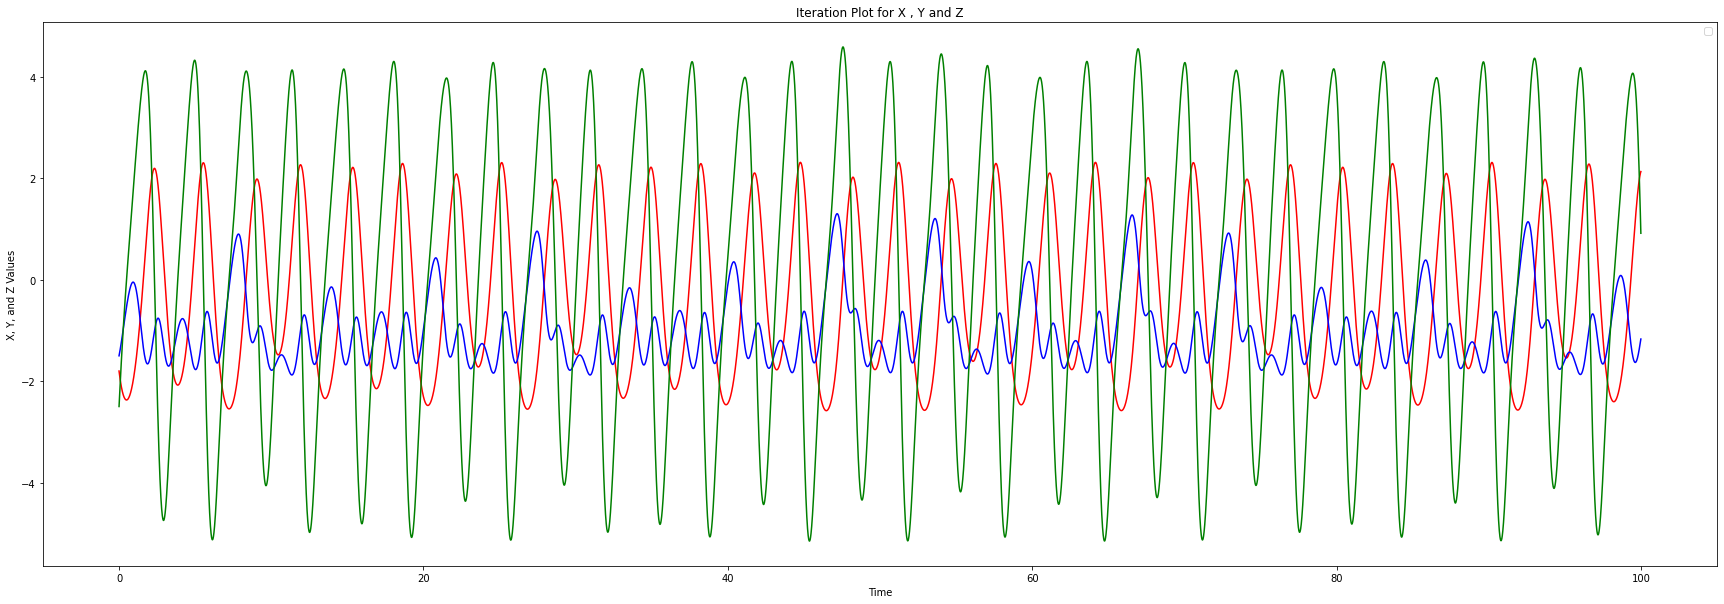

In [ ]:
#Iteration Plots
fig , ax = plt.subplots()
ax.plot(time,x, "r")
ax.plot(time,y, "b")
ax.plot(time,z, "g")
ax.set_xlabel("Time")
ax.set_ylabel("X, Y, and Z Values")
ax.set_title("Iteration Plot for X , Y and Z")
ax.legend()
plt.gcf().set_size_inches(30,10)
plt.show

<function matplotlib.pyplot.show>

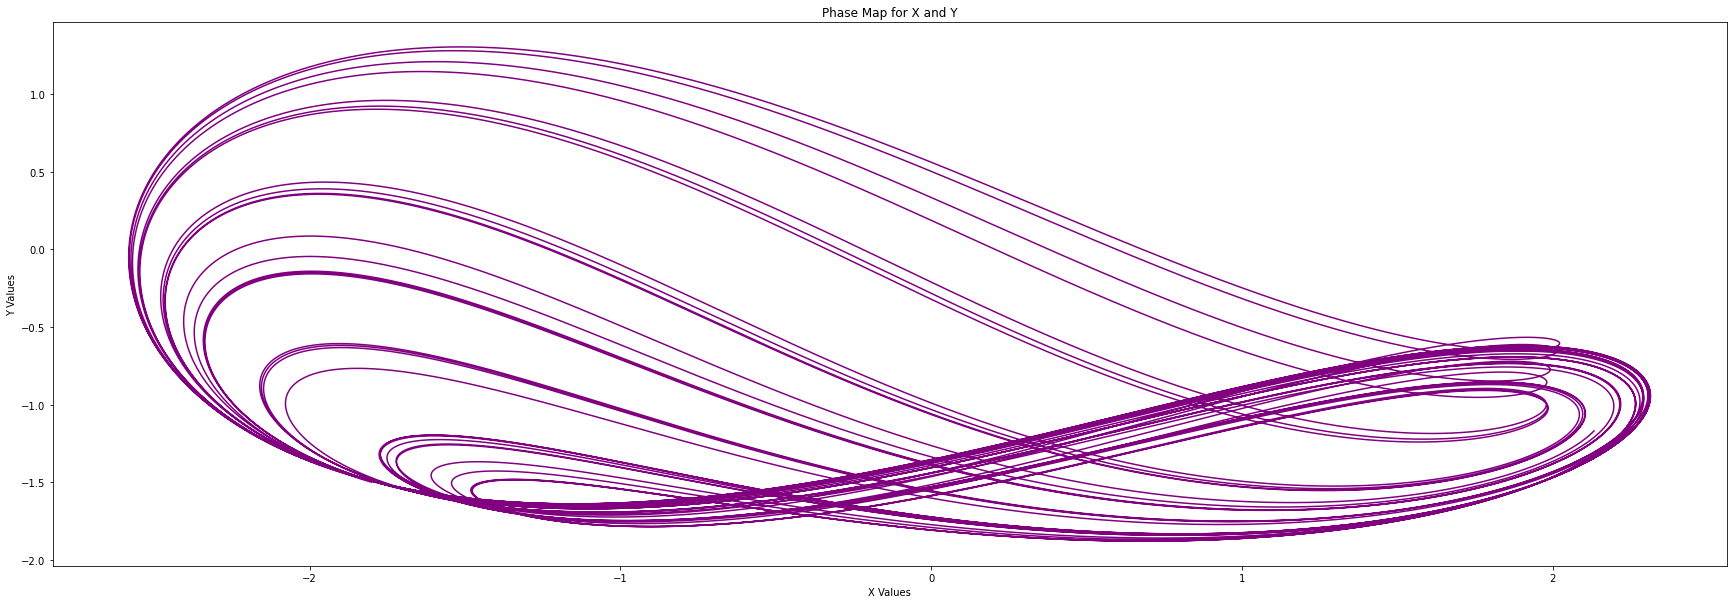

In [ ]:
#Phase Map for X and Y 
fig , ax = plt.subplots()
ax.plot(x,y, "purple")
ax.set_xlabel("X Values")
ax.set_ylabel("Y Values")
ax.set_title("Phase Map for X and Y")
plt.gcf().set_size_inches(30,10)
plt.show

<function matplotlib.pyplot.show>

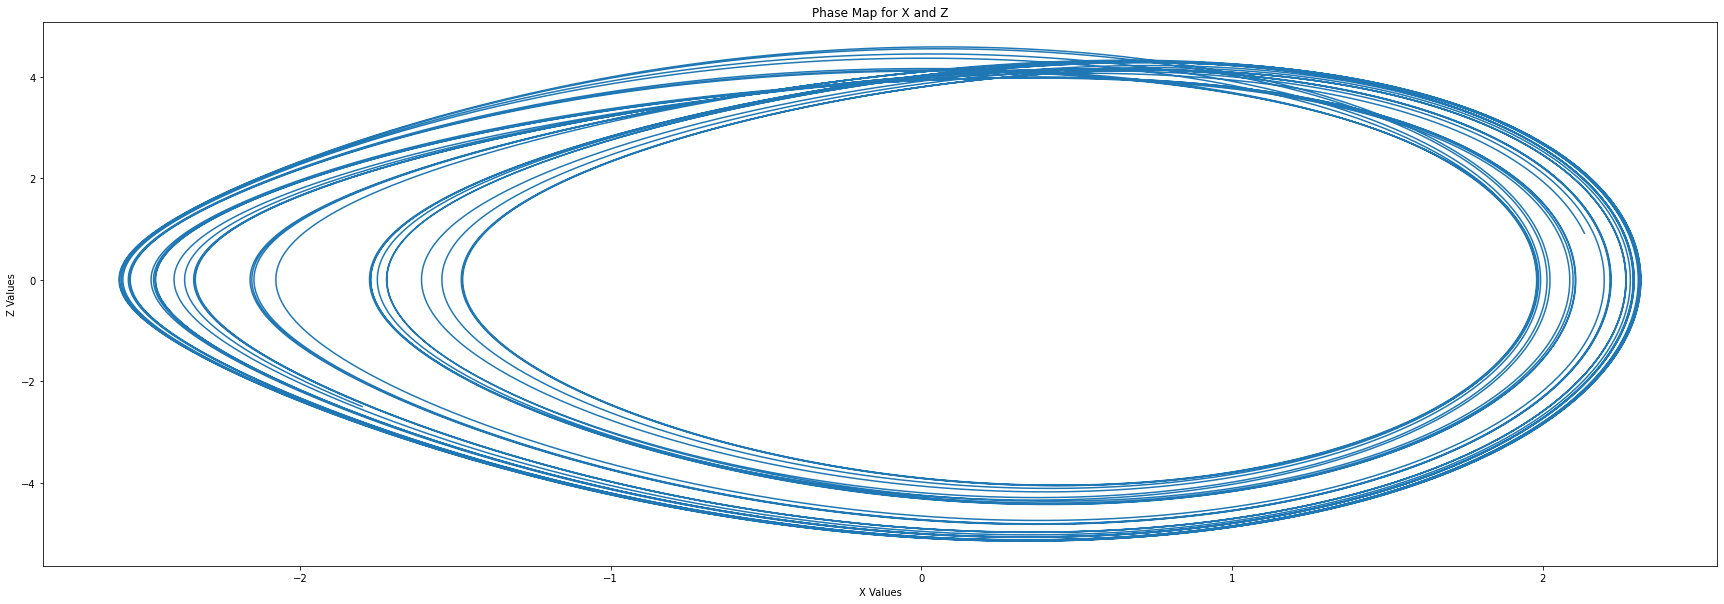

In [ ]:
#Phase Map for X and Z 
fig , ax = plt.subplots()
ax.plot(x,z)
ax.set_xlabel("X Values")
ax.set_ylabel("Z Values")
ax.set_title("Phase Map for X and Z")
plt.gcf().set_size_inches(30,10)
plt.show

These differential equations are exhibiting chaotic behavior within a completely deterministic system. The first graph shows that as we move through time, these deterministic differential euqations which depend and feed each other with each iteration, output values that are not easily predictable and do not follow a predicatable pattern. //

The phase maps show similar behavior to the Lorenz system on which the closer we get to the center the tighter the plot gets. 

#### 2.	[15 pts total] A nice bonus, for some.
A firm trying to sell its product has determined the supply and demand functions are: 
$$S(Q)=5+ln(Q+10)$$

$$D(Q)=10+\frac{100}{Q+2}$$
####In this problem, we will determine the customer and producer surplus using Monte Carlo methods.  

#### a) [5 pts] Calculate both the equilibrium quantity and price. 

To find the equilibrium quantity, $Q_{eq}$, a Monte Carlo search can be performed.  Since 
1. both functions are non-negative for $Q ≥ 0$
2. the supply function is strictly increasing
3. the demand function is strictly decreasing

there is an equillibrium point for $Q > 0$. 

At $Q = 0, D(Q) > S(Q)$.  This will be the first lower bound for the search.  Use $Q = 500$ as the first upper bound since at this point, $D(Q) < S(Q)$.

At each iteration, choose a random number, $Q_i$ between the lower bound and the upper bound.  If $D(Q_i) > S(Q_i)$, set the next lower bound to $Q_i$. Otherwise, set the next upper bound to $Q_i$.  Continue until the tolerance level (the difference between the upper bound and the lower bound) is less than one.  At that point, the integer equilibrium value of $Q_{eq}$ will be the only integer value between the bounds.

To speed the calculation use the triangular distribution ([`numpy.random.Generator.triangular`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.triangular.html)) with the lower bound as the `left` parameter, the midpoint of the lower and upper bound as the `mode`, and the upper bound as the `right` parameter.

In [ ]:
#Equilibirum Quantity
def eq_quant(lower, upper):
  while upper-lower >=1:
    q = np.random.default_rng().triangular(lower, (upper -((upper-lower)/2)), upper)
    sq = 5 + np.log(q+10)
    dq = 10 + (100/(q+2))
    if dq > sq: 
      lower = q 
    else:
      upper = q

  return upper -((upper-lower)/2), sq, dq

eq_quant(0,500)


(222.15734185428389, 10.449100426866211, 10.44533734172866)

Equilibrium Quantity: 222.31 \\

Equilibrium Price: $10.45
(At equilibrium, the market price is equal to where the supply equals demand) 

####b) [4 pts] Consumer surplus.

At the equilibrium price, some customers receive a lower price than they would have paid. The customer surplus, then, is the area between the equilibrium price and the **demand curve** from a quantity of 0 to the equilibrium quantity.  Use dart method from Monte Carlo integration to determine the customer surplus to two decimal places. Use 1,000,000 samples.

In [ ]:
#Set our boundaries for the box 
q_min = 0
q_max = 500 
p_min = 0
p_max = 50 
samples = 1000000
darts_in=0

#Here we throw multiple darts within above box. 

def multi_darts(samples):
  darts_in=0
  for samps in range(samples):
    q = random.uniform(q_min,q_max)
    p = random.uniform(p_min,p_max)
    demand = 10 + (100/(q+2)) 
#We count the dart "inside the consumer surplus" if it is below the demand curve
# AND if it is greater than the equilibirum price
    if q < demand and p > 10.45:
      darts_in += 1
#We then take the darts_in and divide by the samples taken
#Then multiply this probabiity by the area of the box we bounded in the beginning 
  prob = darts_in/samples
  cust_surplus = prob * (q_max - q_min) * (p_max - p_min)
  return cust_surplus


In [ ]:
multi_darts(1000000)

615.1249999999999

Estimate of Consumer Surplus: 617.125

####c) [6 pts] Producer surplus.
At the equilibrium price, some producers receive a higher price than they would required. The producer surplus, then, is the area between the supply curve and the equilibrium price from a quantity of 0 to the equilibrium quantity.  Use the average area method from Monte Carlo integration to determine the producer surplus to two decimal places. Since each random draw gives you a height, it also gives you a sample of the area.  Use these sample areas to determine the average area and the standard deviation for these samples.  Finally, determine the standard deviation of the average area.

In [ ]:
q_min = 0
q_max = 500 
p_min = 0
p_max = 50 
samples = 1000000



def multi_avg(samples):
  supply_list = np.zeros(samples)
  sample_area = np.zeros(samples)
  for samps in range(samples):
    q = random.uniform(q_min,q_max)
    p = random.uniform(p_min,p_max)
    supply_list[samps] = 5 + np.log(q+10)
    sample_area[samps] = supply_list[samps] * (q_max - q_min)
    
  
  producer_surplus = (sum(sample_area)/samples) 
  std_of_samples = np.std(sample_area)
  return producer_surplus, std_of_samples

In [ ]:
multi_avg(1000000)

(5156.254294210031, 414.18303550107515)

Estimate of Producer Surplus: 5156.45 \\
Standard Deviations of the Samples: 413.69

####3. [22 points total] Call up the reserves!
One of the most difficult decisions for a commander is how many forces to put engaged on the front lines and how many to hold back to reinforce later.

Consider the Dewar simulation developed in class and included below. In each of the following questions, represent a battle between red and blue forces in which red has a total of 3,400 soldiers and blue has a total of 2,100 soldiers. To answer the questions, you may (will) need to make some adjustments to the simulation.

####a) [7 pts] Plan A.

Red initially plans to attack with 1,900 holding 1,500 for reinforcements and blue defends with 600 holding 1,500 for reinforcements.  Assume all other assumptions of the Dewar model are maintained.  To make it easier to answer the following questions, you may need to make some small adjustments to your simulation.
1.	Who wins?
2.	After how many time units?
3.	Which of the four withdraw criteria caused the withdraw?
4.	Rounding to two decimal places, how many red forces (those that were engaged as well as those that were in reserve) at the time of the withdraw? to the nearest 1%, what percent of the total red forces as casualties?
5.	Rounding to two decimal places, how many blue forces (those that were engaged as well as those that were in reserve) at the time of the withdraw? To the nearest 1%, what percent of the total blue forces are casualties?
6.  Summarize the changes you made to the code to get these answers.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def attrition(friendly, enemy, factor): 
    return max(0,friendly - factor*enemy)

def reinforcements_A(period, forces, reinf, force_ratio, blocks, thresholds):
    activated = [0, 0] #reinforcements called up
    for iside, side in enumerate(sides):
        reinforce_details = ' '
        neg_red = 2*iside-1
        if blocks[iside][0] > 0 and np.sum(reinf[iside][max(0,period-blocks[iside][2]):period]) == 0:
            if force_ratio*neg_red >= thresholds[iside][0]*neg_red:
                reinforce_details = 'Force Ratio: {0:5.3f} {1:4.1f} '.format(force_ratio, thresholds[iside][0])
            if forces[iside][period] <= thresholds[iside][1]:
                reinforce_details = reinforce_details + 'Engaged: {0:5.3f} {1:4.1f}'.format(forces[iside][period], thresholds[iside][1])
        if reinforce_details != ' ':
            #ANTHONY: Showing that the battle happens twice for some reason, but that all reinforcements are exhausted on both sides
            print(side+' reinforces at', period, reinforce_details)
            # print(blocks)
            blocks[iside][0] -= 1
            activated[iside] = blocks[iside][1]
    return blocks, activated

def withdrawn_A(period, forces, force_ratio, thresholds):
    
    withdraw = [False, '']
    for iside, side in enumerate(sides):
        withdraw_details = ' '
        neg_red = 2*iside-1 
        if force_ratio*neg_red >= thresholds[iside][0]*neg_red:
            withdraw_details = 'Force Ratio: {0:5.3f} {1:4.1f} '.format(force_ratio, thresholds[iside][0])
        if forces[iside][period] <= thresholds[iside][1]:
            #ANTHONY: Edited the wording to be clearer, and added the number of blue forces remaining
            withdraw_details = withdraw_details + 'Forces Remaining: {0:5.3f} Force Withdrawl Threshold{1:4.1f} '.format(forces[iside][period], thresholds[iside][1])
        if withdraw_details != ' ':
            if withdraw[0]: withdraw[1] += ' & '
            withdraw[0] = True
            withdraw[1] += side
            print(side+' withdraws at', period, withdraw_details)
    return withdraw, withdraw_details

In [ ]:
def Dewar_Sim_A(init_red, init_blue):
    
    red = []
    red = np.append(red, init_red)
    red_reinf = []

    blue = []
    blue = np.append(blue, init_blue)
    blue_reinf = []

    blocks = [[5, 300, 70], [5, 300, 70]]
    reinforce_thresholds = [[2.5, 0.8*red[0]],[4.0, 0.8*blue[0]]]
    withdraw_thresholds = [[1.5, 0.7*red[0]],[10.0, 0.7*blue[0]]]

    period = 0
    FR = red[0]/blue[0]
    withdraw = withdrawn_A(period, (red, blue), FR, withdraw_thresholds)[0]
    while not(withdraw[0]):
        #Reinforcements
        blocks, activated = reinforcements_A(period, (red, blue), (red_reinf, blue_reinf), FR, blocks, reinforce_thresholds)
        red_reinf = np.append(red_reinf, activated[0])
        blue_reinf = np.append(blue_reinf, activated[1])
        #Add prior reinforcements, if any
        if period >=70:
            blue[period] += blue_reinf[period-70]
            red[period] += red_reinf[period-70]
        #Atrrition calculation
        blue = np.append(blue, attrition(blue[period], red[period], 1/2048))
        red = np.append(red, attrition(red[period], blue[period], 1/512))

        period += 1
        FR = red[period]/blue[period]
        #ANTHONY: Subsetting withrawn return form function with [0], [1], [2]
        withdraw = withdrawn_A(period, (red, blue), FR, withdraw_thresholds)[0]
     
    return withdraw[1]

In [ ]:
#Question 3A
sides = ['red', 'blue']

# red_reinf_test = Dewar_Sim(1900,600)[2]
# with np.printoptions(threshold=np.inf):
#     print(red_reinf_test)

Dewar_Sim_A(1923,600)

blue reinforces at 133  Engaged: 479.804 480.0
blue withdraws at 203  Forces Remaining: 419.927 Force Withdrawl Threshold420.0 


'blue'

In [ ]:
# winner = []
# sides = ['red', 'blue']

# for red in range(700,1800,10):
#     winner = np.append(winner, Dewar_Sim(red, 500)[1]=='blue')

Put your 6 answers here:\
a 1)  We see that blue actually wins this battle, even though red had signifacantly more initial forces. \
a 2) The period at which blue wins is 1845. \
a 3) **The red criteria for percent of original red forces remaining triggered the withdraw.** From the above output we see that red had 1328 forces at the time of withdrawl, which is less than 70% of the original forces, hence the withrdraw trigger.\
a 4) By checking the "block" list at the end of the battle, we see that both sides used all 1500 of their reinforcements. At the time of withdraw, 1328 red forces withdrew. With 3400 total forces, losing all 1500 reserves and remaining with only 1328 forces to withdraw, red sustained $3400-1338 = 2062$ casulties. \
**That is, Red Casault Persentage is: ~60.65% (2062/3400)** \
a 5) Again, we see that blue used all their reinforcements (From the above output, we see the simulation runs twice with the exact same numbers but in total, both times blue uses all ts reinforcments). We see that the blue forces remaining is at 583. As such, Blue burned through all 1500 reserves and sustained $2100-583= 1517$ casulties. \
**That is, Blue Casualty Percentage is  ~72.24% (1517/2100)**  \
a 6) I first un-commented your print statment showing which side withdrew and at which time. Then I edited the reinforcement print statement and un-commented it. I also showed through the red_reinf_test that all forces were used in reserves (the same is true for blue) as well as returning the blocks showing that all 5 times of reinforcements were called. I added the blue forces remaining in the withdraw details by including "iside+1". This only works when red withdraws, since if blue withrdaws the index goes out of bounds, but it works for this problem. 

####b) [15 pts] Plan B.
The red commander, Gen. Rich, is aware that blue is putting 600 soldiers on the front line and holding 1,500 as reinforcements.  Gen. Rich believes there must be a strategy for employing his forces that allows him to win (his primary desire) and with the win, to preserve as many of his soldiers as possible (his secondary desire).

Gen. rich knows that he must attack with at least 1,800 of his men in order to have a 3:1 advantage.  He will not consider a strategy with less than this initial attacking force.  Of course, he cannot attack with more than 3,400 (his maximum number of forces). Furthermore, he is only interested in increments of 10 soldiers from (and including) 1,800 to 3,400.

Whatever forces he does not use in the initial attack are kept in reserve and used according to the threshold, quanity in a block, and delay rules.  

As he thinks this through, he realizes that he might want to attack with an initial force that does not leave a number of reinforcements that is evenly divisible by 300 (the quantity in each reinforcement block).  In this case, all but the last reinforcement block will have 300 and the last one will have the remainder.  For example, if he attacks with 2,600 soldiers, he will have 800 in reserve.  This will allow him to have three reinforcement blocks.  The first two will have 300 and the last one will have the remaining 200.

b 1) Is Gen. Rich able to find a reinforcement strategy that allows him to win?  Describe the changes you made to your code to answer this question.  Also, provide a version of you code with comments showing what you changed.

In [ ]:
def attrition(friendly, enemy, factor): 
    return max(0,friendly - factor*enemy)

def reinforcements(period, forces, reinf, force_ratio, blocks, thresholds,reserve):
    activated = [0, 0] 
    for iside, side in enumerate(sides):
        reinforce_details = ' '
        neg_red = 2*iside-1
        if blocks[iside][0] > 0 and np.sum(reinf[iside][max(0,period-blocks[iside][2]):period]) == 0:
            if force_ratio*neg_red >= thresholds[iside][0]*neg_red:
                reinforce_details = 'Force Ratio: {0:5.3f} {1:4.1f} '.format(force_ratio, thresholds[iside][0])
            if forces[iside][period] <= thresholds[iside][1]:
                reinforce_details = reinforce_details + 'Engaged: {0:5.3f} {1:4.1f}'.format(forces[iside][period], thresholds[iside][1])
        if reinforce_details != ' ':
            blocks[iside][0] -= 1
            #ANTHONY(1): If the reserves are >=300, we reinforce with 300 
            #ANTHONY(2): Since reserves is a list we have to subset using [0]
            if reserve[iside][0] >= 300:
              activated[iside] = blocks[iside][1]
            #ANTHONY(3): Once it's less than 300, we reinforce with what is left in the "reserve" 
            else:
              activated[iside] = reserve[iside][0]
            #ANTHONY(4):Ensuring we subtract how many we called from the total reserve number 
            reserve[iside][0] -= activated[iside]
    return blocks, activated
def withdrawn(period, forces, force_ratio, thresholds):
   
    withdraw = [False, '']
    for iside, side in enumerate(sides):
        withdraw_details = ' '
        neg_red = 2*iside-1 
        if force_ratio*neg_red >= thresholds[iside][0]*neg_red:
            withdraw_details = 'Force Ratio: {0:5.3f} {1:4.1f} '.format(force_ratio, thresholds[iside][0])
        if forces[iside][period] <= thresholds[iside][1]:
            #ANTHONY(5): Edited the wording to be clearer, and added the number of blue forces remaining
            withdraw_details = withdraw_details + 'Forces Remaining: {0:5.3f} Force Withdrawl Threshold{1:4.1f} '.format(forces[iside][period], thresholds[iside][1]) + str(forces[iside-1][period])
        if withdraw_details != ' ':
            if withdraw[0]: withdraw[1] += ' & '
            withdraw[0] = True
            withdraw[1] += side
            # print(side+' withdraws at', period, withdraw_details, )
    return withdraw, withdraw_details

In [ ]:
def Dewar_Sim_B(init_red, init_blue):
    
    red = []
    red = np.append(red, init_red)
    red_reinf = []
    #ANTHONY(6): Added a reserves tracker
    #ANTHONY(7): Every iteration updates the number in reserve for red. Blues is constant
    reserves = [[3400-init_red], [1500]]

    blue = []
    blue = np.append(blue, init_blue)
    blue_reinf = []

    blocks = [[5, 300, 70], [5, 300, 70]]
    reinforce_thresholds = [[2.5, 0.8*red[0]],[4.0, 0.8*blue[0]]]
    withdraw_thresholds = [[1.5, 0.7*red[0]],[10.0, 0.7*blue[0]]]

    period = 0
    FR = red[0]/blue[0]
    withdraw = withdrawn(period, (red, blue), FR, withdraw_thresholds)[0]
    while not(withdraw[0]):
        #Reinforcements
        blocks, activated = reinforcements(period, (red, blue), (red_reinf, blue_reinf), FR, blocks, reinforce_thresholds, reserve = reserves)
        red_reinf = np.append(red_reinf, activated[0])
        blue_reinf = np.append(blue_reinf, activated[1])
        #Add prior reinforcements, if any
        if period >=70:
            blue[period] += blue_reinf[period-70]
            red[period] += red_reinf[period-70]
        #Atrrition calculation
        blue = np.append(blue, attrition(blue[period], red[period], 1/2048))
        red = np.append(red, attrition(red[period], blue[period], 1/512))

        period += 1
        FR = red[period]/blue[period]
        
        
        withdraw = withdrawn(period, (red, blue), FR, withdraw_thresholds)[0]
        with_dets = withdrawn(period, (red, blue), FR, withdraw_thresholds)[1]
        
    return withdraw[1], reserves, period, with_dets

In [ ]:
Dewar_Sim_B(1930,600)

('blue',
 [[1470], [1200]],
 203,
 ' Forces Remaining: 419.229 Force Withdrawl Threshold420.0 1728.4295901229746')

In [1]:
# R0 = np.arange(1800,3410,10)
# winner_A = []
# for red in range(1800,3410, 10):
#     winner_A = np.append(winner_A, Dewar_Sim_A(red, 600)=='blue')


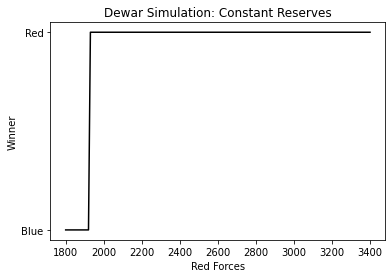

In [ ]:
#Showing a constant 1500 Reserves looks like
plt.plot(R0, winner_A, c='k')
plt.title("Dewar Simulation: Constant Reserves")
plt.xlabel("Red Forces")
plt.ylabel("Winner")
plt.yticks((0.0, 1.0), ('Blue', 'Red'))
plt.show()
#This is showing a red force that exceeds the maximum number of troops of 3400 as we have 1500 troops in reserve and increase until 3400 + 1500. Here, anything after 1923 causes red to win, but we do not have that many forces

1930 1470.0 1.0 [[1470], [1200]] 203  Forces Remaining: 419.229 Force Withdrawl Threshold420.0 1728.4295901229746
1940 1460.0 1.0 [[1460], [1200]] 201  Forces Remaining: 419.930 Force Withdrawl Threshold420.0 1740.2644403639852


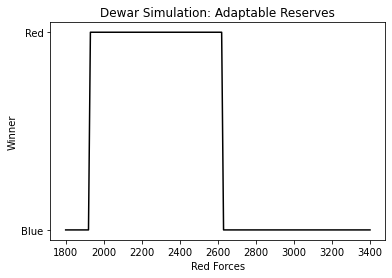

In [ ]:
#Adaptable Reserves for Gen Rich
R0 = np.arange(1800,3410,10)
winner_B = []
reserve_count = []
for red in range(1800,3410, 10):
    winner_B = np.append(winner_B, Dewar_Sim_B(red, 600)[0]=='blue')
    reserve_count = np.append(reserve_count, Dewar_Sim_B(red, 600)[1][0],)
    if winner_B[-1] == 1 and red < 1950:
      print(red, reserve_count[-1], winner_B[-1],Dewar_Sim_B(red, 600)[1], Dewar_Sim_B(red, 600)[2], Dewar_Sim_B(red, 600)[3])
  
plt.plot(R0, winner_B, c='k')
plt.title("Dewar Simulation: Adaptable Reserves")
plt.xlabel("Red Forces")
plt.ylabel("Winner")
plt.yticks((0.0, 1.0), ('Blue', 'Red'))
plt.show()

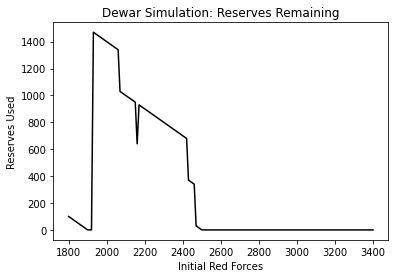

In [ ]:
plt.plot(R0, reserve_count, c='k')
plt.title("Dewar Simulation: Reserves Remaining")
plt.xlabel("Initial Red Forces")
plt.ylabel("Reserves Used")
plt.show()


b 1) I created an adaptable reserve tracker which updates every iteration at ANTHONY(6) and ANTHONY(7). \\ 
Above this, I added a few if statements to align with the rules of reinforcing troops at 300 every time except for the last one if the number of reserves is not divisible by 300. ANTHONY (1) - ANTHONY (4) At that point we just send it what the reserves has left. \\

From above we see that the way we rech the first objective, winning, we need between about 1930 to 2600 troops. 

I also created two graphs for part b, which show, along with the print statement that the best strategy to lose the least amount of people and still win, is to use 1930 forces at the front lines holding 1470 in reserve 

####If Gen. Rich is able to find a winning strategy, answer these questions: 
2.	How many red forces are initially engaged? How many are initially held as reinforcements?
3.	After how many time units?
4.	Which of the four withdraw criteria caused the withdraw?
5.	Rounding to two decimal places, how many blue forces (those that were engaged as well as those that were in reserve) at the time of the withdraw?
6. Rounding to two decimal places, how many blue forces (those that were engaged as well as those that were in reserve) at the time of the withdraw?

Put your 5 answers here:\
b 2) The number of red forces initially engaged is 1930, the number in reinforcements is 1470\
b 3) 203 Time Unites (Period 203) \
b 4) Blue withdrew because of percantage of forces remaining\
b 5) Blue: $419.23 + 1200 = 1619.23$\
b 6) Red: $ 1728 + 1470 = 3198$
